# 1. Introduction

---
- Nama: Ghassani Nurbaningtyas
- Batch: SBY-003
- This notebook analyzes the data from supermarket sales.

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data.

[Dataset](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)

[Dashboard](https://public.tableau.com/app/profile/ghassani.nurbaningtyas/viz/Milestone1_17074035654900/Story1)

---

# 2. Identifying The Problem

## Using SMART Framework

- **Specific**: Identify patterns in consumer purchasing behavior and factors influencing sales performance
- **Measurable**: Quantify sales revenue, product preferences and the impact of various variables  (e.g., purchase timing, customer type, payment method) on sales performance across different branches and time periods.
- **Achievable**: It is feasible to uncover trends and patterns in consumer behavior and sales performance.
- **Relevant**: Understanding consumer behavior and factors influencing sales is crucial for supermarkets facing high market competition.
- **Timebound**: Aiming to provide actionable insights and strategic recommendations for the next Q2

## Problem Statement

Identify patterns in consumer purchasing behavior and factors affecting sales performance to provide actionable insights and strategic recommendations for the upcoming Q2.

## Define The Problem (5W +1H)

- Bagaimana kecenderungan dan distribusi totdal sales? (Statistik Deskriptif)
- Bagaimana total sales selama Q1?
- Bagaimana total sales setiap cabang selama Q1 dan perbulannya?
- Bagaimana tren penjualannya berdasarkan tanggal dan bagaimana korelasinya? (Statistik Deskriptif)
- Bagaimana tren penjualannya berdasarkan waktu transaksi dan bagaimana korelasinya? (Statistik Deskriptif)
- Apa Produk line yang paling diminati dari kuantitas dan total salesnya?
- Apa Product line yang paling diminati ditiap cabang?
- Apakah Ada Perbedaan Rata-Rata Penjualan terhadap Kategori produk? (Statistik Inferensial)
- Apakah pengaruh Customer Type terhadap total transaksi?

# 3. Data Loading

## 3.1 Import Library

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## 3.2 Data Loading

[Dataset](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)

In [2]:
# Load the dataset
df = pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


From our dataset we can learn that the column provide information such:
- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer
- Product line: General item categorization groups - - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Our dataset has no missing value, and the data obtained has 16 columns 1000 rows.The data type also matches the value in it. Just date column and time should be of type datetime.

In [4]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [5]:
df.duplicated().sum()

0

The dataset has no duplicate values.

# 4. Data Cleaning

Cause the dataset don't have duplicates and missing values, we dont need to handling missing value and drop the duplicate.

## 4.1 Data Type Conversion

Cause date column and time that the data type not yet datetime, so we need to convert it to datetime.

In [6]:
# Change Data Type to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

# Check All the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

Now date and time column already datetime.

## 4.2 Save The Data

Our dataset already clean now, so we need to save it. Then we can move to exploratory data analysis.

In [7]:
# Save The Clean Data
df.to_csv('clean_data.csv')

# 5. Exploratory Data Analysis

## 5.1 Analisa Kecenderungan dan distribusi Total Sales

### Central Tendency

Kita akan melakukan perhitungan statistik deskriptif terhadap total sales. Statistik deskriptif ini meliputi rata-rata, median, standar deviasi, skewness, dan kurtosis. Hal ini dilakukan untuk lebih memahami distribusi dan karakteristik data total sales.

In [8]:
# Central Tendency Harga
print(f"Rata-rata Total Penjualan: $ {df['Total'].mean():.2f}")
print(f"Median Total Penjualan: $ {df['Total'].median():.2f}")
print('Modus Total Penjualan: $', df['Total'].mode().values[0])

Rata-rata Total Penjualan: $ 322.97
Median Total Penjualan: $ 253.85
Modus Total Penjualan: $ 87.234


Rata-rata pendapatan toko adalah `$322.97` menggambarkan seberapa besar pendapatan rata-rata yang dihasilkan oleh toko tersebut dari penjualan produknya dengan nilai tengah `$ 253.85`. 

Total transaksi yang sering ditemui memiliki nilai `$ 87.23`, dilihat dari jauh nya nilai modus dan rata-rata memberikan indikasi sebaran datanya tidak normal.

### Persebaran Data

Selanjutnya coba kita cek persebaran datanya, karena dari pernyataan di atas, mengindikasikan distribusi data tidak normal.

In [9]:
# Mencari nilai standard deviasi
print(f"Standard Deviasi Total Penjualan: {df['Total'].std():.2f}")
print(f"Standard Deviasi Harga / Unit: {df['Unit price'].std():.2f}")
print(f"Standard Deviasi Rating: {df['Rating'].std():.2f}")
print(f"Standard Deviasi Unit terjual: {df['Quantity'].std():.2f}")

Standard Deviasi Total Penjualan: 245.89
Standard Deviasi Harga / Unit: 26.49
Standard Deviasi Rating: 1.72
Standard Deviasi Unit terjual: 2.92


Nilai standard deviasi pada Total Penjualan dan Harga / Unit menunjukkan bahwa memiliki variasi yang besar terutama pada Total Penjualan. Diidentifikasi adanya penjualan dengan total yang sangat tinggi dalam dataset. 

Untuk kolom rating dan unit terjual terindikasi memiliki variasi data namun tidak se-ekstrem pada kolom total penjualan.

<AxesSubplot:xlabel='Total', ylabel='Count'>

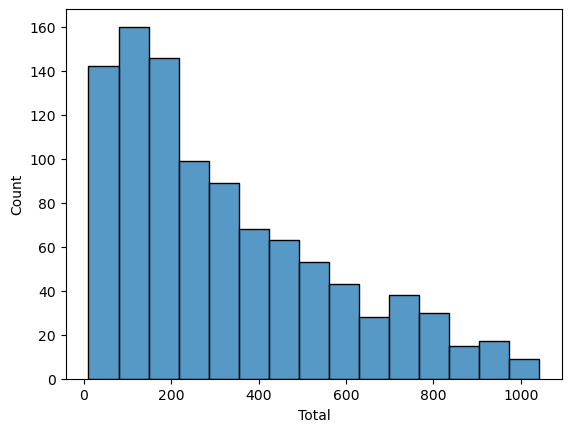

In [10]:
# Distribusi data total penjualan
sns.histplot(data=df, x='Total')

Dari chart diatas, terlihat bahwa persebaran data tidak normal dan condong ke kiri.

### Skewness & Kurtosis

Ksrena persebaran data tidak norma, kita coba cek skewness dan kurtosisnya.

In [11]:
# Cek skewness
print(f"Skewness Total Penjualan: {df['Total'].skew():.2f}")
# Cek Kurtosis
print(f"Kurtosis Total Penjualan: {df['Total'].kurtosis():.2f}")


Skewness Total Penjualan: 0.89
Kurtosis Total Penjualan: -0.08


Terlihat skewness total penjualan merupakan moederately skewed dan merupakan positive skew yang artinya sebagian besar data memiliki nilai penjualan yang lebih rendah.

Nilai kurtosis menunjukkan bahwa data cenderung tersebar lebih merata di sekitar nilai rata-rata `(Platykurtic)`.

Karena data terdeteksi adanya outlier, mari kita cek dahulu data outliernya.

<AxesSubplot:>

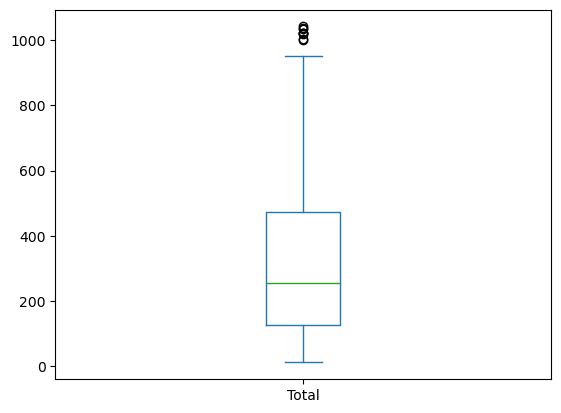

In [12]:
q1 = df['Total'].quantile(0.25)
q3 = df['Total'].quantile(0.75)
iqr = q3-q1
upbon = q3 + 1.5*iqr
lowbon = q1 - 1.5*iqr
# Cek outlier menggunakan boxplot
df['Total'].plot(kind='box')

Outlier berada diatas batas atas, sebelum kita handling sebaiknya kita cek dahulu datanya.

In [13]:
# cek data yang outlier
outlier = df[(df['Total'] > upbon) | (df['Total']<lowbon)].sort_values('Total',ascending=False)
outlier

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.30,10,49.650,1042.650,2019-02-15,1900-01-01 14:53:00,Credit card,993.0,4.761905,49.650,6.6
167,687-47-8271,A,Yangon,Normal,Male,Fashion accessories,98.98,10,49.490,1039.290,2019-02-08,1900-01-01 16:20:00,Credit card,989.8,4.761905,49.490,8.7
557,283-26-5248,C,Naypyitaw,Member,Female,Food and beverages,98.52,10,49.260,1034.460,2019-01-30,1900-01-01 20:23:00,Ewallet,985.2,4.761905,49.260,4.5
699,751-41-9720,C,Naypyitaw,Normal,Male,Home and lifestyle,97.50,10,48.750,1023.750,2019-01-12,1900-01-01 16:18:00,Ewallet,975.0,4.761905,48.750,8.0
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,2019-03-02,1900-01-01 17:16:00,Ewallet,973.8,4.761905,48.690,4.4
792,744-16-7898,B,Mandalay,Normal,Female,Home and lifestyle,97.37,10,48.685,1022.385,2019-01-15,1900-01-01 13:48:00,Credit card,973.7,4.761905,48.685,4.9
422,271-88-8734,C,Naypyitaw,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2019-02-08,1900-01-01 13:00:00,Credit card,972.1,4.761905,48.605,8.7
166,234-65-2137,C,Naypyitaw,Normal,Male,Home and lifestyle,95.58,10,47.790,1003.590,2019-01-16,1900-01-01 13:32:00,Cash,955.8,4.761905,47.790,4.8
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,2019-01-09,1900-01-01 13:45:00,Cash,954.4,4.761905,47.720,5.2


In [14]:
# persen outlier
print(f"Persentase nilai outlier: {len(outlier)*100/len(df['Total'])}")

Persentase nilai outlier: 0.9


Dari data diatas, outlier hanya 0.9 % dari keseluruhan data dan jika kita lihat data outliernya diperoleh dari customer yang belanja dalam quantity besar dengan harga per unit yang tinggi. Karena outliersnya alami maka akan kita abaikan dan tidak menghapus outliersnya.

## 5.2 Analisa Total Penjualan

Karena kita ingin mengetahui strategi meningkatkan total penjualan, kita evaluasi dahulu penjualan pada Q1.

### Analisa Total Penjualan pada Q1

Kita analisa dahulu tren penjualannya selama Q1

      Month       Total
0   January  116291.868
2     March  109455.507
1  February   97219.374


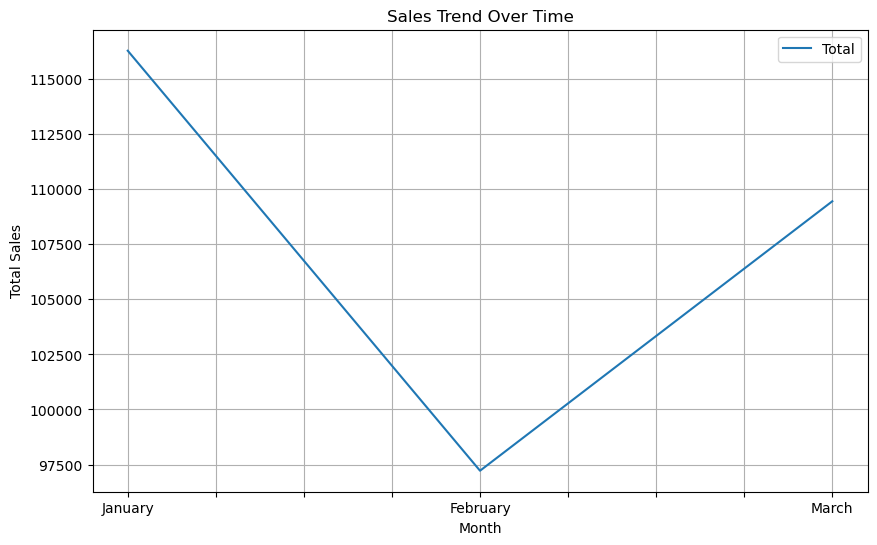

In [15]:
# Menambahkan kolom bulan
df['Month'] = df['Date'].dt.strftime('%m')
df['Month'] = df['Month'].astype(str)

# Tren Penjualan di Q1
salem = df.groupby(df['Month'])['Total'].sum().reset_index()
salem['Month'] = salem['Month'].replace({'01': 'January', '02': 'February', '03': 'March'})
sales_month = salem.sort_values('Total',ascending=False)
print(sales_month)

# Visualisasi
ax = salem.plot(x='Month', y='Total', kind='line', figsize=(10, 6))
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.set_title('Sales Trend Over Time')
ax.grid(True)
plt.show()

Ternyata total penjualan pada Q1 bulan Januari memiliki penjualan paling tinggi, dan penjualan pada bulan Februari terpantau paling rendah selama Q1. Kita bisa mencari tahu apa yang terjadi di bulan Februari yang menyebabkan penjualan menurun. Sebelum itu mari kita lihat total penjualan setiap cabang pada Q1.

## 5.3 Analisa Penjualan Setiap Cabang

Setelah kita mengetahui total sales selama Q1, kita cari tahu total sales tiap cabang selama Q1, lalu kita lihat total sales tiap bulannya.

### Total sales tiap cabang selama Q1

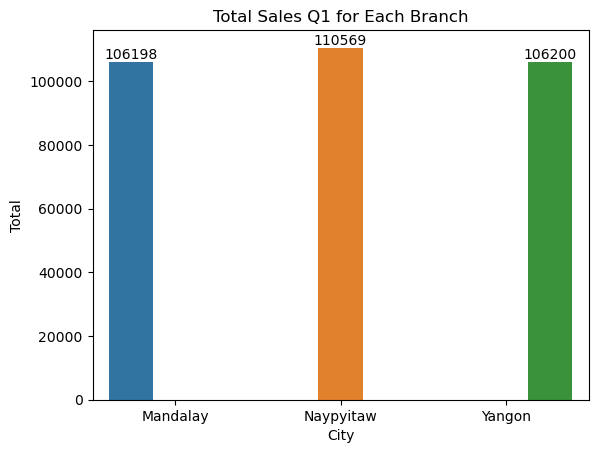

In [16]:
# Total sales Q1 tiap cabang
kota = df.groupby('City')['Total'].sum().reset_index()
ax = sns.barplot(data=kota,x='City', y='Total', hue='City')
plt.title('Total Sales Q1 for Each Branch')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.legend([], [], frameon=False)
plt.show()

Dari data diatas, Cabang Naypitaw memilki total sales tertinggi selama Q1. Ini bisa membuat cabang lain menjadikan Naypitaw acuan dalam strategi menaikkan total penjualan cabang lainnya. Tapi bagaimana dengan total sales tiap cabang per bulannya? Mari kita lihat:

### Analisa Penjualan Cabang Setiap Bulannya

  Month       City       Total
0    01   Mandalay  37176.0585
1    01  Naypyitaw  40434.6810
2    01     Yangon  38681.1285
3    02   Mandalay  34424.2710
4    02  Naypyitaw  32934.9825
5    02     Yangon  29860.1205
6    03   Mandalay  34597.3425
7    03  Naypyitaw  37199.0430
8    03     Yangon  37659.1215


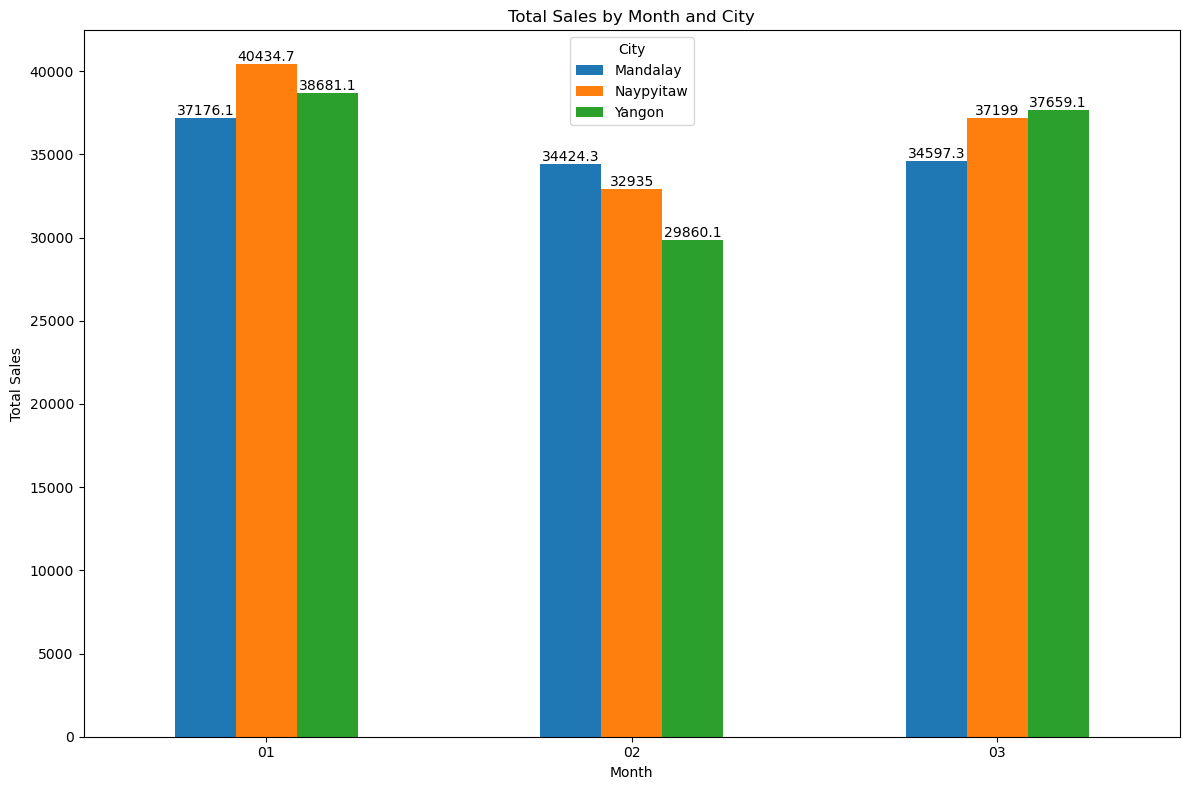

In [17]:
# Cek penjualan / bulan disetiap cabang
monthct = df.groupby(['Month', 'City'])['Total'].sum().reset_index()
print(monthct)

# Bentuk data menggunakan pivot
pivot_month = monthct.pivot(index='Month', columns='City', values='Total')

# Visualisasi menggunakan bar plot
ax = pivot_month.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month and City')
plt.legend(title='City')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Data yang ditampilkan menunjukkan pada bulan February semua cabang memiliki total penjualan yang paling kecil dari bulan-bulan lainnya. Sedangkan setiap bulannya, semua cabang secara bergantian menjadi cabang yang memiliki total penjualan terbanyak. tren total sales tiap cabang per bulannya sama satu sama lain.

## 5.4 Tren Penjualan berdasarkan tanggal & Korelasinya

Setelah kita melihat tren penjualan selama Q1 dan per bulannya, coba sekarang kita lihat tren penjualan berdasarkan tanggal. Hal ini dilakukan agar kita bisa menemukan pola perilaku konsumen.

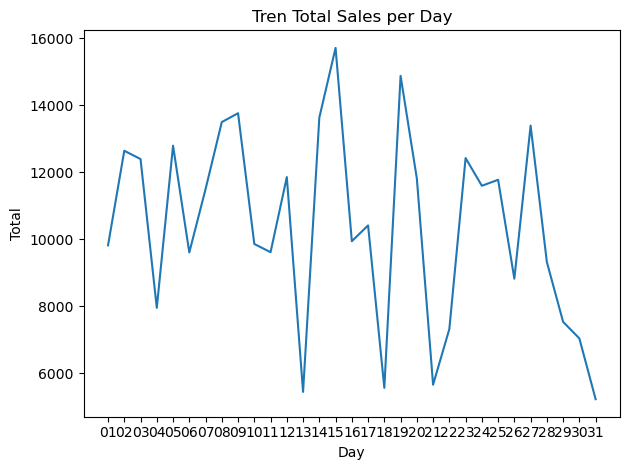

In [18]:
# Buat kolom untuk tanggal
df['Day'] = df['Date'].dt.strftime('%d')
# Ambil total penjualan berdasarkan tanggal
day = df.groupby('Day')['Total'].sum().reset_index()
# Visualisasi
sns.lineplot(data=day, x='Day', y='Total')
plt.title('Tren Total Sales per Day')
plt.tight_layout()
plt.show()

Dari tren total sales berdasarkan tanggal transaksinya,dapat dilihat pada akhir bulan menunjukkan total sales paling rendah. Mari kita lihat korelasi menggunakan scatter plot.

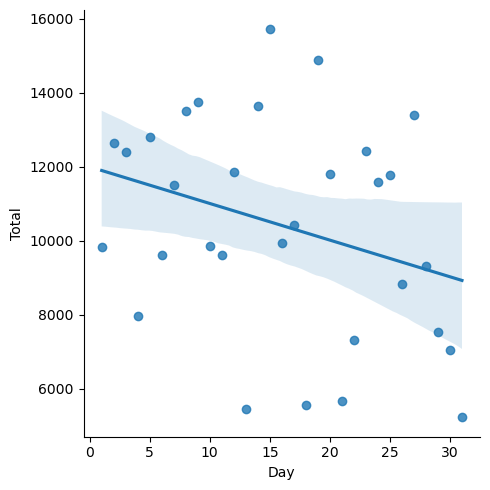

In [19]:
# Lihat menggunakan scatter plot
day['Day'] = day['Day'].astype(int)
sns.lmplot(data=day, x='Day',y='Total')

Berdasarkan grafik scatter plot di atas, menunjukkan adanya hubungan yang linier dan ngeatif antara Tanggal Transaksi dengan total sales. Ini berarti semakin akhir bulan, total sales semakin mengalami penurunan. Mari kita hitung berapa nilai korelasinya. 

In [20]:
corr_r, pval_p = stats.pearsonr(day['Day'], day['Total'])
corr_rho, pval_s = stats.spearmanr(day['Day'], day['Total'])
corr_tau, pval_k = stats.kendalltau(day['Day'], day['Total'])

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

r-correlation: -0.31, p-value: 0.09014426529205871
rho-correlation: -0.32, p-value: 0.0787106990455658
tau-correlation: -0.20, p-value: 0.1268163608618809


Perhitungan nilai korelasi diatas menunjukkan adanya hubungan korelasi negatif yang lemah - moderat antara tanggal dan total penjualan. Namun karena nilai korelasi yang diatas -1 dan mendekati 0 artinya tidak ada korelasi antara tanggal transakisi dan total sales. Nilai p-value > 0.05 menunjukkan `tidak ada korelasi antara tanggal dan total sales`.

## 5.5 Tren Penjualan Terhadap Waktu & Korelasinya

Setelah melihat total sales dari Q1, bulan, dan tanggal. Coba kita lihat tren total sales berdasarkan waktu dan korelasinya.

    Time       Total
0     10  31421.4810
1     11  30377.3295
2     12  26065.8825
3     13  34723.2270
4     14  30828.3990
5     15  31179.5085
6     16  25226.3235
7     17  24445.2180
8     18  26030.3400
9     19  39699.5130
10    20  22969.5270


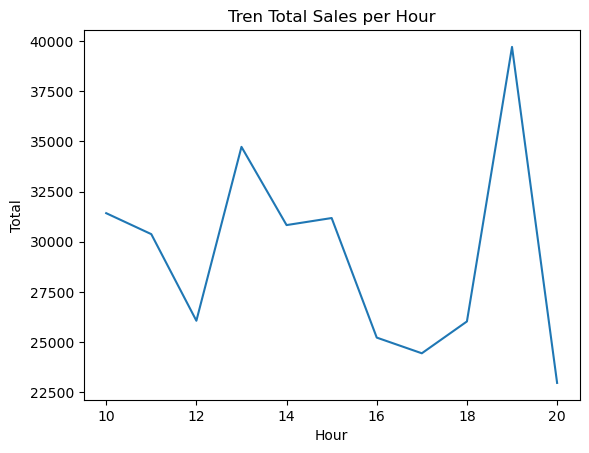

In [21]:
# Total Sales per Hour
jam = df.groupby(df['Time'].dt.hour)['Total'].sum().reset_index()
print(jam)
# Visualisasi Tren Sales per Hour
sns.lineplot(data=jam, x='Time', y='Total')
plt.title('Tren Total Sales per Hour')
plt.xlabel('Hour')
plt.show()

Dari tren diatas, total sales tertinggi berada pada pukul 19.00, dan pada pukul 13.00 kemungkinan customer adalah pekerja sehingga ke supermarket waktu jam istirahat dan jam pulang kerjanya. Mari kita lihat dengan scatterplot apakah ada korelasinya.

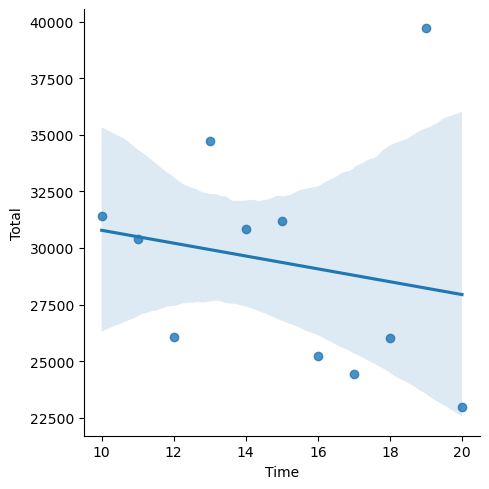

In [22]:
# Lihat menggunakan scatter plot
sns.lmplot(data=jam, x='Time',y='Total')

In [23]:
# Menghitung Nilai Korelasinya
corr_r, pval_p = stats.pearsonr(jam['Time'], jam['Total'])
corr_rho, pval_s = stats.spearmanr(jam['Time'], jam['Total'])
corr_tau, pval_k = stats.kendalltau(jam['Time'], jam['Total'])

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

r-correlation: -0.19, p-value: 0.5794759615221791
rho-correlation: -0.39, p-value: 0.23454006709519432
tau-correlation: -0.31, p-value: 0.21834651074234407


Setelah kita melihat scatterplot dan nilai korelasi terhadap waktu dan total sales, menunjukkan adanya hubungan negatif yang lemah sampai sedang antara jam kunjung dan total penjualan, tetapi karena nilai p-value yang tinggi, hubungan antara jam kunjung dan total penjualan mungkin terjadi secara kebetulan atau akibat dari variasi acak dalam data.

## 5.6 Analisa Produk line yang paling diminati dari kuantitas dan total sales

Selanjutnya kita akan melakukan analisa terhadap product line. Kita akan coba bandingkan kategori dengan penjualan terbanyak, dan kategori dengan total sales tertinggi.

In [24]:
# Sum Quantity dan sum total sales per Product line
df_product_category = df.groupby(['Product line']).agg(Sold=('Quantity', 'sum'), Sales=('Total', 'sum'))
df_product_category


,Sold,Sales
Product line,,
Electronic accessories,971,54337.5315
Fashion accessories,902,54305.8950
Food and beverages,952,56144.8440
Health and beauty,854,49193.7390
Home and lifestyle,911,53861.9130
Sports and travel,920,55122.8265


Kita juga bisa buat visualisasinya agar lebih mudah dalam menganalisa.

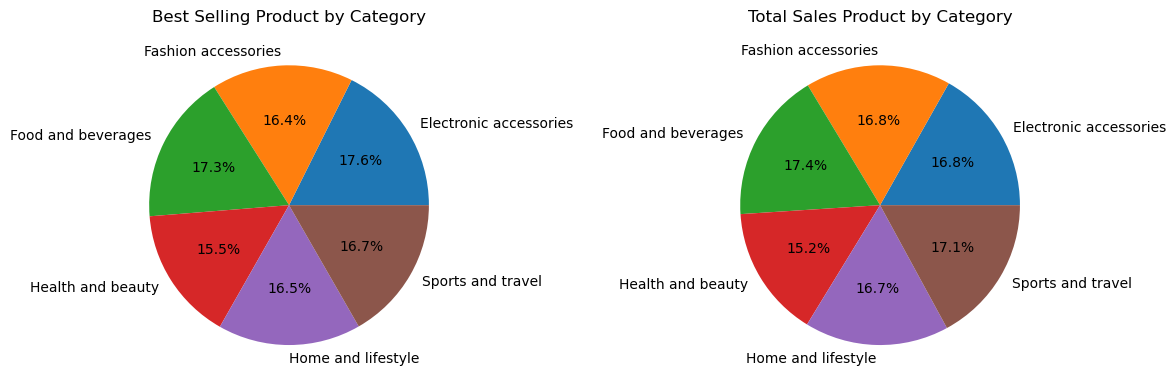

In [25]:
# Buat pie chart untuk produk yang terjual paling banyak dan paling tinggi
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].pie(df_product_category["Sold"], labels=df_product_category["Sold"].index, autopct='%.1f%%')
ax[0].set_title("Best Selling Product by Category")

ax[1].pie(df_product_category["Sales"], labels=df_product_category["Sales"].index, autopct='%.1f%%')
ax[1].set_title("Total Sales Product by Category")
plt.tight_layout()
plt.show()

Dari tabel diatas, kategori produk food and baverages memiliki total penjualan tertinggi ($56,144.84), sementara kategori produk dengan total penjualan terendah adalah Health and Beauty ($49,193.74).

Meskipun Electronic Accessories memiliki jumlah unit terjual tertinggi (971 unit), total penjualan mereka tidak sebesar kategori Food and Beverages yang memiliki jumlah unit terjual sedikit lebih rendah (952 unit).

Kita bisa ambil insight untuk meningkatkan total sales, kita bisa membuat variasi food and baverages karena terlihat konsumen menyukainya walaupun harganya mahal, rasanya dan kualitasnya harus baik. Electronic Accessories kita bisa tingkatkan harga per unitnya sehingga total sales kita meningkat, karena kategori ini merupakan kategori yang disukai dari jumlah pembeliannya.

## 5.7 Analisa Product Line yang Paling Diminati Ditiap Cabang

In [26]:
# Sum Quantity dan sum total sales per Product line per branch
df_product_category = df.groupby(['City', 'Product line']).agg(Sold=('Quantity', 'sum'), Sales=('Total', 'sum'))
df_product_category

Sold       Sales
City      Product line                            
Mandalay  Electronic accessories   316  17051.4435
          Fashion accessories      297  16413.3165
          Food and beverages       270  15214.8885
          Health and beauty        320  19980.6600
          Home and lifestyle       295  17549.1645
          Sports and travel        322  19988.1990
Naypyitaw Electronic accessories   333  18968.9745
          Fashion accessories      342  21560.0700
          Food and beverages       369  23766.8550
          Health and beauty        277  16615.3260
          Home and lifestyle       245  13895.5530
          Sports and travel        265  15761.9280
Yangon    Electronic accessories   322  18317.1135
          Fashion accessories      263  16332.5085
          Food and beverages       313  17163.1005
          Health and beauty        257  12597.7530
          Home and lifestyle       371  22417.1955
          Sports and travel        333  19372.6995

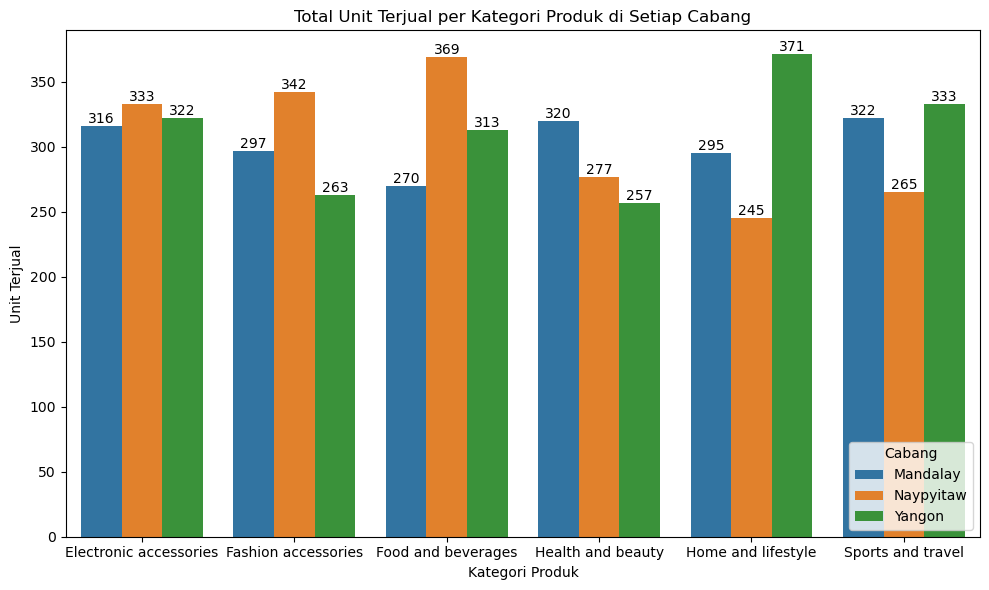

In [27]:
# Sum Quantity dan sum total sales per Product line per branch
df_product_category = df.groupby(['City', 'Product line']).agg(Sold=('Quantity', 'sum'), Sales=('Total', 'sum')).reset_index()
df_product_category
# Membuat bar plot untuk total kuantitas di setiap kategori produk di setiap cabang
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_product_category, x='Product line', y='Sold', hue='City')
plt.title('Total Unit Terjual per Kategori Produk di Setiap Cabang')
plt.xlabel('Kategori Produk')
plt.ylabel('Unit Terjual')
plt.xticks(rotation=0)
plt.legend(title='Cabang', loc='lower right')
plt.tight_layout()
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()


Dapat dilihat bahwa kategori produk dengan jumlah unit terjual tertinggi di setiap kota berbeda-beda. Cabang Mandalay kategori produk dengan jumlah unit terjual tertinggi adalah Sports and travel (322 unit), sementara di Naypyitaw kategori produk tersebut adalah Food and beverage (369 unit), dan Yangon dengan home and lifestyle (371 unit).

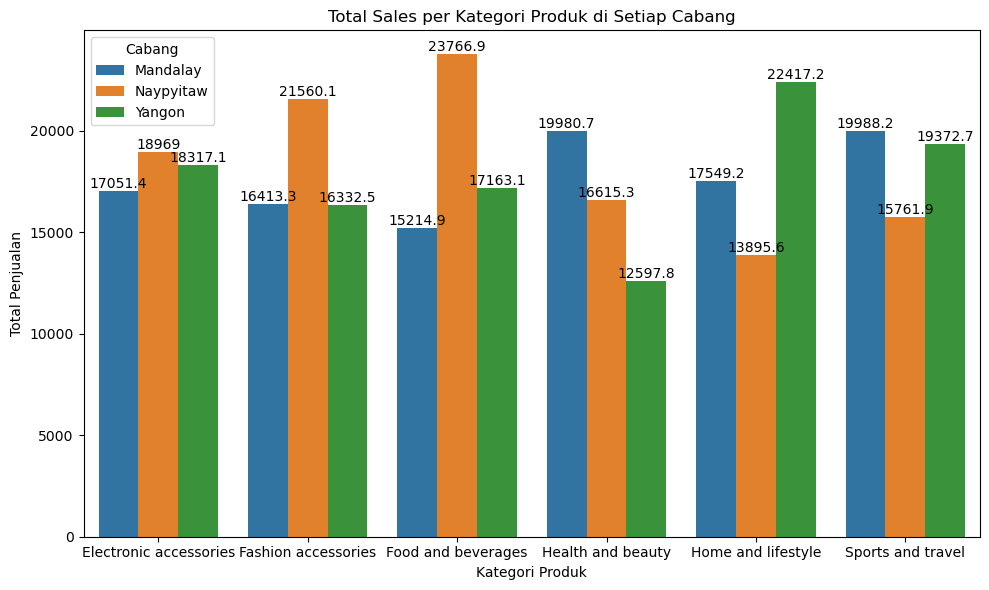

In [28]:
# Sum Quantity dan sum total sales per Product line per branch
df_product_category = df.groupby(['City', 'Product line']).agg(Sold=('Quantity', 'sum'), Sales=('Total', 'sum')).reset_index()
df_product_category
# Membuat bar plot untuk total penjualan di setiap kategori produk di setiap cabang
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_product_category, x='Product line', y='Sales', hue='City')
plt.title('Total Sales per Kategori Produk di Setiap Cabang')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=0)
plt.legend(title='Cabang', loc='upper left')
plt.tight_layout()
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.show()
19980+23766+22417
66163

Total penjualan untuk setiap kategori produk juga bervariasi di setiap kota.
Misalnya, di Naypyitaw, total penjualan tertinggi terjadi pada kategori Food and beverages (23766.8550), sementara di Yangon, kategori Home and lifestyle (22417.1955) memiliki total penjualan tertinggi, dan di Mandalay kategori sport and travel memiliki total penjualan tertinggi.

Perbedaan dalam kategori produk yang paling diminati oleh pelanggan di setiap kota menunjukkan perbedaan preferensi dan kebutuhan pasar lokal.
Hal ini menunjukkan pentingnya untuk menyesuaikan strategi pemasaran dan manajemen stok sesuai dengan preferensi pelanggan di setiap kota.

## 5.8 Analisa Perbedaan Kuantitas Penjualan terhadap Kategori produk

Selanjutnya kita ingin mengetahui preferensi pelanggan dari berbagai jenis produk dalam supermarket. Kita akan menggunakan ANOVA dalam melakukan tes ini.

- `Hipotesis nol (H0)`: Tidak ada perbedaan signifikan dalam kuantitas produk terjual antara kategori produk.
- `Hipotesis alternatif (H1)`: Terdapat perbedaan signifikan dalam kuantitas produk terjual antara kategori produk.

In [29]:
# Quantitas per each product line
Health = df['Quantity'][df['Product line']=='Health and beauty']
Elec = df['Quantity'][df['Product line']=='Electronic accessories']
Home = df['Quantity'][df['Product line']=='Home and lifestyle']
Sport = df['Quantity'][df['Product line']=='Sports and travel']
Food = df['Quantity'][df['Product line']=='Food and beverages']
Fash = df['Quantity'][df['Product line']=='Fashion accessories']
# Hitung dengan ANOVA
res = stats.f_oneway(Health, Elec, Home, Sport, Food, Fash)
print('P-value:',res.pvalue)

P-value: 0.3284513179558293


Karena nilai p-value yang didapatkan > 0.05, H0 gagal ditolak sehingga H0 diterima. Jadi `Tidak ada perbedaan signifikan dalam kuantitas produk terjual antara kategori produk`.

## 5.8 Analisa Customer Type terhadap Total Transaksi

In [30]:
df_cust = df.groupby(['Customer type']).agg(Transaksi=('Quantity', 'count'))
df_cust

,Transaksi
Customer type,
Member,501
Normal,499


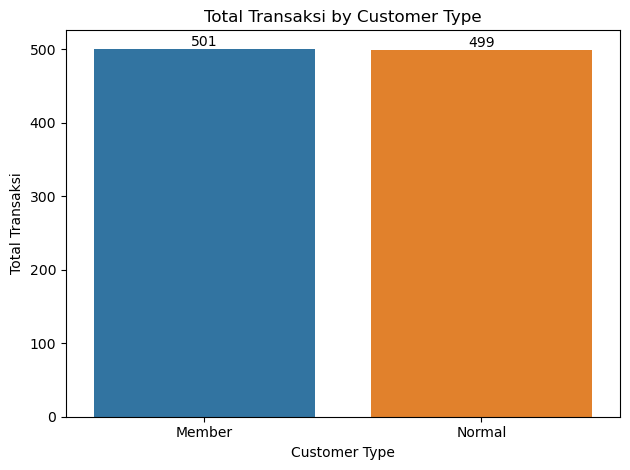

In [31]:
# Box plot untuk total transaksi per customer type
ax = sns.barplot(x=df_cust.index, y='Transaksi', data=df_cust)
plt.title("Total Transaksi by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Transaksi")
plt.bar_label(ax.containers[0])
plt.tight_layout()
plt.show()

Dari data transaksi yang ditampilkan, jumlah transaksi antara pelanggan Member dan Normal hampir seimbang, dengan Member memiliki 501 transaksi dan Normal memiliki 499 transaksi. Hal ini menunjukkan bahwa kedua jenis pelanggan berkontribusi secara hampir sama dalam jumlah transaksi, meskipun pelanggan Member sedikit lebih banyak.

Perusahaan dapat mengevaluasi efektivitas program keanggotaan yang ditawarkan. karena perbedaan yang sedikit perusahaan harus menyesuaikan strategi pemasaran dan penawaran promosi, serta meningkatkan nilai yang ditawarkan kepada pelanggan untuk mendorong lebih banyak transaksi dan meningkatkan loyalitas.

# 6. Kesimpulan

Berdasarkan hasil analisa yang telah dilakukan, rekomendasi strategis untuk meningkatkan total sales pada Q2 diantaranya:
- Memperkuat strategi pemasaran untuk kategori Food and Beverages yang diminati.
- Melakukan analisis lebih lanjut terhadap tren penjualan pada bulan Februari untuk menentukan faktor penyebab penurunan penjualan.
- Mengoptimalkan strategi pemasaran dan promosi untuk meningkatkan jumlah transaksi dan loyalitas pelanggan, terutama di antara pelanggan Normal.
- Meningkatkan pengelolaan stok dan penyusunan produk untuk mencocokkan preferensi pelanggan di setiap cabang.
- Memperkuat program keanggotaan dengan menawarkan nilai tambah yang lebih besar kepada pelanggan untuk mendorong lebih banyak transaksi dan meningkatkan retensi